What is the nicest city to live in?

Notes
*   warmest?
*   least rain?
*   has snow?
*   score based on all attributes would be the most objective (maybe number of days could be a good counter and then rank. must prioritise attributes)






In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [ ]:
inndf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Innsbruck_weather_2015-19.csv")
inndf.head()

,date,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),month,month-year,year
0,2015-01-01,-3.137500,-7.4,1.0,724.241667,92.458333,1.166667,0.0,Jan,Jan-2015,2015
1,2015-01-02,-3.341667,-9.2,1.5,721.975000,94.875000,1.125000,1.6,Jan,Jan-2015,2015
2,2015-01-03,1.458333,0.4,3.2,717.537500,96.833333,1.791667,13.1,Jan,Jan-2015,2015
3,2015-01-04,2.108333,-0.2,4.6,717.608333,79.291667,3.041667,25.9,Jan,Jan-2015,2015
4,2015-01-05,-0.841667,-5.3,2.4,721.662500,74.875000,2.666667,0.3,Jan,Jan-2015,2015


In [ ]:
len(inndf)

1826

In [ ]:
inndf.dtypes

date                   object
mean_temp (deg C)     float64
min_temp (deg C)      float64
max_temp (deg C)      float64
mean_pressure (mb)    float64
mean_humidity (%)     float64
mean_wind (ms-1)      float64
precip_sum (mm)       float64
month                  object
month-year             object
year                    int64
dtype: object

In [ ]:
#get monthly averages
inndf = inndf.groupby('month').mean()
len(inndf)
#need to order months
month_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
inndf = inndf.reindex(month_ordered)
inndf

,mean_temp (deg C),min_temp (deg C),max_temp (deg C),mean_pressure (mb),mean_humidity (%),mean_wind (ms-1),precip_sum (mm),year
month,,,,,,,,
Jan,-1.036986,-4.572258,3.523226,710.995404,84.563344,2.028521,7.080000,2017.000000
Feb,1.459536,-2.696454,7.192199,710.668417,77.120303,2.071454,3.158865,2016.992908
Mar,6.061640,0.803871,12.434839,709.293662,69.261675,2.447647,4.507097,2017.000000
Apr,10.601215,4.645333,16.982667,710.002559,64.274459,2.805385,5.587333,2017.000000
May,14.001605,8.596129,20.202581,709.830970,69.726098,2.369585,10.334839,2017.000000
Jun,18.983879,13.187333,25.584000,711.072269,68.044504,2.257706,11.106667,2017.000000
Jul,19.910417,14.322581,26.470323,711.496566,70.569659,1.934507,11.485806,2017.000000
Aug,19.554905,13.970323,26.247097,712.556892,72.964836,2.022288,14.955484,2017.000000
Sep,14.570158,9.645333,20.586000,712.863897,76.828923,1.865618,9.295333,2017.000000


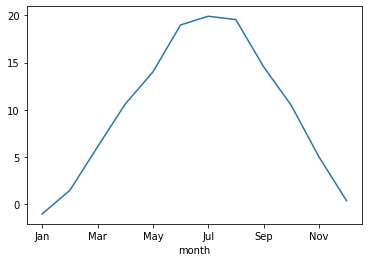

In [ ]:
inndf['mean_temp (deg C)'].plot()

more ideas on what to look into:


*   days of snow (need to look into conditions)
*   compare average temps (one graph)
*   days of rain
*   sort by priority. i.e. lowest rainfall, highest temp, lowest wind speed





In [ ]:
londf = pd.read_csv(r"https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/London_weather_2015-19.csv")